0. Saving concatenated parquet files into DataFrame

In [545]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

concatenatedfile_path=os.path.join("..", "data", "processed","concatenated_data")

event=pd.read_parquet(f'{concatenatedfile_path}/event_concatenated.parquet')
away_team=pd.read_parquet(f'{concatenatedfile_path}/away_team_concatenated.parquet')
away_team_score=pd.read_parquet(f'{concatenatedfile_path}/away_team_score_concatenated.parquet')
home_team=pd.read_parquet(f'{concatenatedfile_path}/home_team_concatenated.parquet')
home_team_score=pd.read_parquet(f'{concatenatedfile_path}/home_team_score_concatenated.parquet')
odds=pd.read_parquet(f'{concatenatedfile_path}/odds_concatenated.parquet')
pbp=pd.read_parquet(f'{concatenatedfile_path}/pbp_concatenated.parquet')
power=pd.read_parquet(f'{concatenatedfile_path}/power_concatenated.parquet')
round=pd.read_parquet(f'{concatenatedfile_path}/round_concatenated.parquet')
season=pd.read_parquet(f'{concatenatedfile_path}/season_concatenated.parquet')
statistics=pd.read_parquet(f'{concatenatedfile_path}/statistics_concatenated.parquet')
time=pd.read_parquet(f'{concatenatedfile_path}/time_concatenated.parquet')
tournament=pd.read_parquet(f'{concatenatedfile_path}/tournament_concatenated.parquet')
venue=pd.read_parquet(f'{concatenatedfile_path}/venue_concatenated.parquet')
votes=pd.read_parquet(f'{concatenatedfile_path}/votes_concatenated.parquet')


0. Function to determine winner code of each match based on point by point records

In [546]:
def determine_winner_code_basedon_pbp():
    unique_matchids = pd.Series(pbp['match_id'].unique())
    results = []
    
    # Iterate over each unique match ID
    for match in unique_matchids:
        my_match = pbp[pbp['match_id'] == match]
        max_home_score = my_match['home_score'].max()
        max_away_score= my_match['away_score'].max()
        if max_home_score > max_away_score:
            winner = 'home'  # Home team wins
        else:
            winner = 'away'  # Away team wins

        # Append the match ID and winner to the results list
        results.append({'match_id': match, 'winner': winner})

    # Create a DataFrame from the results list
    winner_df = pd.DataFrame(results)
    return winner_df

winnercode_df=determine_winner_code_basedon_pbp()

1. How many tennis players are included in the dataset?

In [549]:
# Extract player_id columns
home_player_ids = home_team['player_id']
away_player_ids = away_team['player_id']

# Combine and count unique player_ids
all_player_ids = pd.concat([home_player_ids, away_player_ids])
unique_player_ids = all_player_ids.unique()

# Number of unique players
num_unique_players = len(unique_player_ids)
print(f'The number of unique tennis players in the dataset is: {num_unique_players}')

The number of unique tennis players in the dataset is: 2352


2. What is the average height of the players?

In [550]:
# Extract height columns
home_team_height=home_team[['player_id','height']]
away_team_height=away_team[['player_id','height']]

# Combine and count unique player_id and height
all_heights=pd.concat([home_team_height,away_team_height]).drop_duplicates().dropna()

average_height=all_heights['height'].mean()
# average_height will be formatted with two decimal places
print(f'The average height of the players is: {average_height:.2f}')

The average height of the players is: 1.82


3. Which player has the highest number of wins?

In [551]:
# Merge winnerCode with home/away team to find player id and name of the winner
home_winners = winnercode_df[winnercode_df['winner'] == 'home'].merge(home_team[['match_id','player_id','name']], on='match_id', how='inner').drop_duplicates()
away_winners = winnercode_df[winnercode_df['winner'] == 'away'].merge(away_team[['match_id','player_id','name']], on='match_id', how='inner').drop_duplicates()

all_winners=pd.concat([home_winners,away_winners])

# Count the number of wins for each player
win_counts = all_winners.groupby(['player_id', 'name']).size().reset_index(name='count')

# Find the player with the highest number of wins
top_player = win_counts.loc[win_counts['count'].idxmax()]
print(f'Player with the highest number of wins is : {top_player["name"]} (ID : {top_player["player_id"]}) with {top_player["count"]} wins')

Player with the highest number of wins is : Sun F. (ID : 163438) with 15 wins


4. What is the longest match recorded in terms of duration?

In [552]:
time['total_duration'] = time[['period_1', 'period_2', 'period_3', 'period_4', 'period_5']].sum(axis=1, skipna=True)

# Find the match with the longest duration
longest_match = time.loc[time['total_duration'].idxmax()]
print(f'The match with the ID : {longest_match["match_id"]} has the longest duration, which is : {longest_match["total_duration"]/3600} hours.')

The match with the ID : 12346747.0 has the longest duration, which is : 47.5425 hours.


5. How many sets are typically played in a tennis match?

The typical number of sets played in the tennis match of dataset is 2 sets.


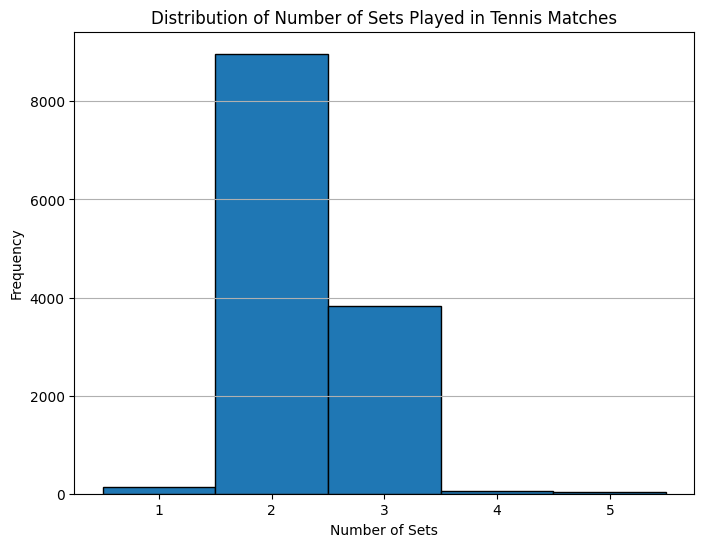

In [553]:
# Calculate the number of sets played in each match
time['num_sets'] = time[['period_1', 'period_2', 'period_3', 'period_4', 'period_5']].notnull().sum(axis=1)

# Find the most common number of sets played (mode)
typical_num_sets = time['num_sets'].mode()[0]
print(f"The typical number of sets played in the tennis match of dataset is {typical_num_sets} sets.")


# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(time['num_sets'], bins=range(1, 7), edgecolor='black', align='left')
plt.xlabel('Number of Sets')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Sets Played in Tennis Matches')
plt.xticks(range(1, 6))
plt.grid(axis='y')

# Show the plot
plt.show()

6. Which country has produced the most successful tennis players?

The country that has produced the most successful tennis players is USA with 462 wins.


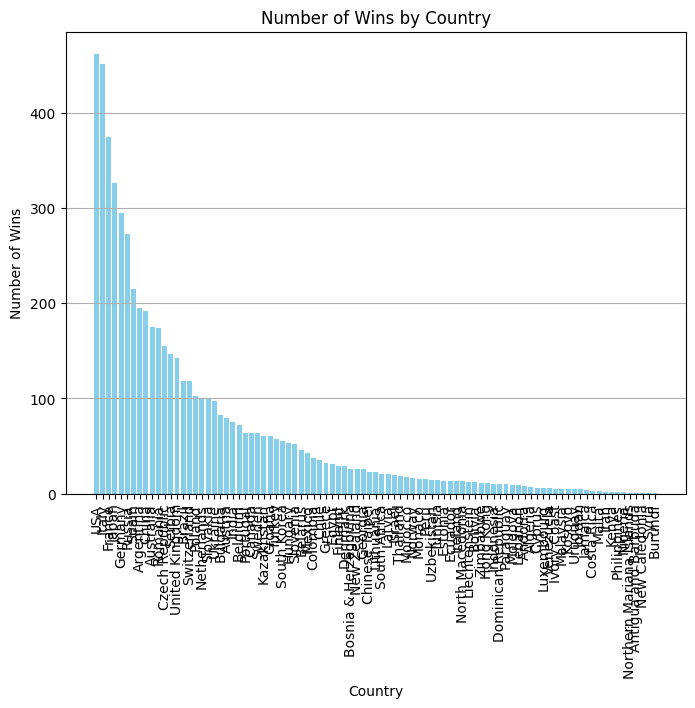

In [554]:
# Merge winnerCode with home/away team to find player id and country of the winner
home_winners_country = winnercode_df[winnercode_df['winner'] == 'home'].merge(home_team[['match_id','player_id','country']], on='match_id', how='inner').drop_duplicates()
away_winners_country = winnercode_df[winnercode_df['winner'] == 'away'].merge(away_team[['match_id','player_id','country']], on='match_id', how='inner').drop_duplicates()

all_winners_country=pd.concat([home_winners_country,away_winners_country])

# Count the number of wins for each country
win_counts_country = all_winners_country['country'].value_counts().reset_index(name='count')

# Find the player with the highest number of wins
most_successful_country = win_counts_country.loc[win_counts_country['count'].idxmax()]
print(f"The country that has produced the most successful tennis players is {most_successful_country['country']} with {most_successful_country['count']} wins.")

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(win_counts_country['country'], win_counts_country['count'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Wins')
plt.title('Number of Wins by Country')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()


7. What is the average number of aces per match?

The average number of aces per match is: 4.05


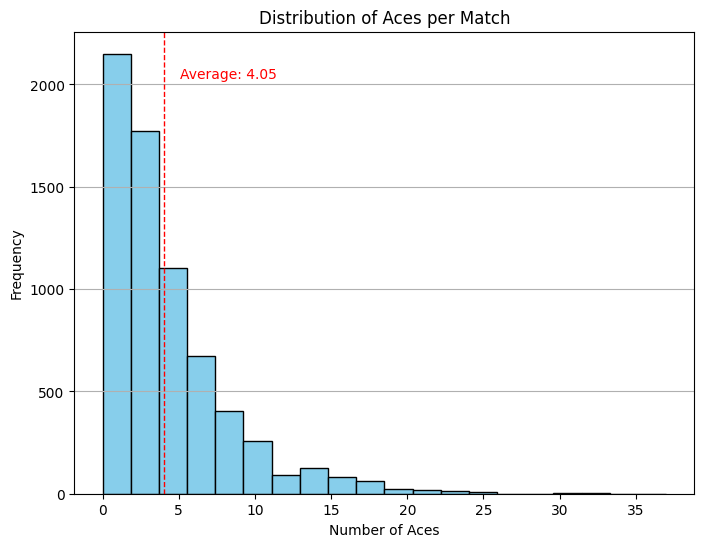

In [555]:
# Filter for aces data for the entire match
aces_data = statistics[(statistics['period'] == 'ALL') & (statistics['statistic_name']=='aces')].drop_duplicates(subset=['match_id', 'period'])

# Sum the aces for both home and away teams for each match
aces_data['total_aces']  = aces_data['home_stat'].astype(int) + aces_data['away_stat'].astype(int)

average_aces_per_match = aces_data['total_aces'].mean()
print(f"The average number of aces per match is: {average_aces_per_match:.2f}")

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(aces_data['total_aces'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(average_aces_per_match, color='red', linestyle='dashed', linewidth=1)
plt.text(average_aces_per_match + 1, plt.ylim()[1] * 0.9, f'Average: {average_aces_per_match:.2f}', color='red')
plt.xlabel('Number of Aces')
plt.ylabel('Frequency')
plt.title('Distribution of Aces per Match')
plt.grid(axis='y')

# Show the plot
plt.show()

8. Is there a difference in the number of double faults based on gender?

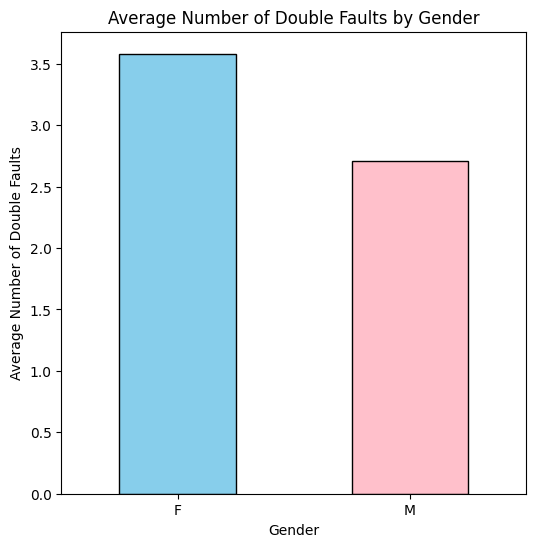

In [556]:
# Filter for double faults data for the entire match
double_faults_data=statistics[(statistics['period'] == 'ALL') & (statistics['statistic_name']=='double_faults')].drop_duplicates(subset=['match_id', 'period'])
# & (statistics['match_id'] == 12344252)

# Select relevant columns and rename them for merging
home_team_info = home_team[['match_id', 'gender']].drop_duplicates().rename(columns={'gender': 'home_gender'})
away_team_info = away_team[['match_id', 'gender']].drop_duplicates().rename(columns={'gender': 'away_gender'})

# Merge double_faults_data with home and away team info to get gender information
double_faults_with_gender = double_faults_data.merge(home_team_info, on='match_id', how='inner').merge(away_team_info, on='match_id', how='inner')

# Separate home and away double faults and rename them for concatenation
home_double_faults = double_faults_with_gender[['home_gender', 'home_stat']].rename(columns={'home_gender': 'gender', 'home_stat': 'double_faults'})
away_double_faults = double_faults_with_gender[['away_gender', 'away_stat']].rename(columns={'away_gender': 'gender', 'away_stat': 'double_faults'})

# Combine home and away double faults into one DataFrame
all_double_faults = pd.concat([home_double_faults, away_double_faults]).dropna()

# Convert double_faults to numeric
all_double_faults['double_faults'] = pd.to_numeric(all_double_faults['double_faults'], errors='coerce')

# Calculate the average number of double faults by gender
average_double_faults_by_gender = all_double_faults.groupby('gender')['double_faults'].mean()

average_double_faults_by_gender

# Plot the average number of double faults by gender
average_double_faults_by_gender.plot(kind='bar', color=['skyblue', 'pink'], edgecolor='black', figsize=(6, 6))
plt.xlabel('Gender')
plt.ylabel('Average Number of Double Faults')
plt.title('Average Number of Double Faults by Gender')
plt.xticks(rotation=0)

# Display the plot
plt.show()


9. Which player has won the most tournaments in a single month?

In [557]:
# Merge all_winners with tournament info to get tournament
tournament_winners=all_winners.merge(tournament[['match_id','tournament_id']],on='match_id', how='inner').drop_duplicates()
tournament_wins=tournament_winners[['player_id','name']].value_counts().reset_index(name='win_count')

# Find the player with the highest number of wins in current month
most_tournament_wins = tournament_wins.sort_values(by='win_count', ascending=False).iloc[0]
print(f"The player with the highest number of tournament wins in a single month is {most_tournament_wins['name']} (ID: {most_tournament_wins['player_id']}) with {most_tournament_wins['win_count']} wins in current month.")

The player with the highest number of tournament wins in a single month is Uchijima M. (ID: 253356) with 15 wins in current month.


10. Is there a correlation between a player's height and their ranking?

The correlation between player height and their ranking is: 0.09


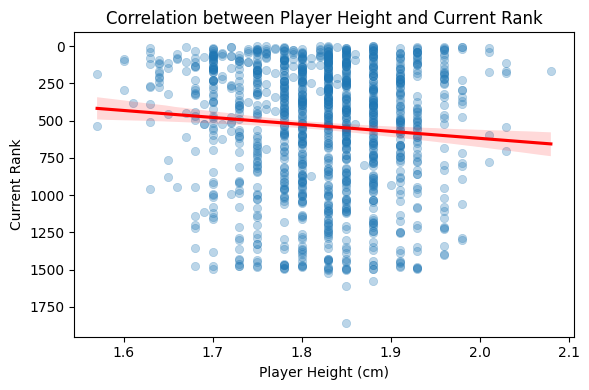

In [562]:
# Combine home and away team info to get player dataset
player_info = pd.concat([home_team, away_team]).drop_duplicates(subset=['player_id'])

# Select relevant columns
player_height_ranking = player_info[['player_id', 'height', 'current_rank']]

# Drop rows with missing values in 'height' or 'current_rank'
player_height_ranking = player_height_ranking.dropna(subset=['height', 'current_rank'])

# Calculate the correlation
correlation = player_height_ranking['height'].corr(player_height_ranking['current_rank'])
print(f'The correlation between player height and their ranking is: {correlation:.2f}')

# Plot the data
plt.figure(figsize=(6, 4))
sns.scatterplot(data=player_height_ranking, x='height', y='current_rank', alpha=0.3, edgecolor=None)
sns.regplot(data=player_height_ranking, x='height', y='current_rank', scatter=False, color='red')

plt.xlabel('Player Height (cm)')
plt.ylabel('Current Rank')
plt.title('Correlation between Player Height and Current Rank')
plt.gca().invert_yaxis()  # Invert y-axis to show lower ranks (higher rankings) at the top
plt.tight_layout()

# Display the plot
plt.show()

11. What is the average duration of matches?

In [442]:
# Calculate the average duration
average_duration = time['total_duration'].mean()
print(f'The average duration of matches is: {average_duration/60:.2f} minutes')

The average duration of matches is: 84.11 minutes


12. What is the average number of games per set in men's matches compared to women's matches?

The average number of games per set in men's matches is 9.22.
The average number of games per set in women's matches is 8.93.


/tmp/ipykernel_9761/3326259559.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Average Games per Set', data=average_games_data, palette='viridis')


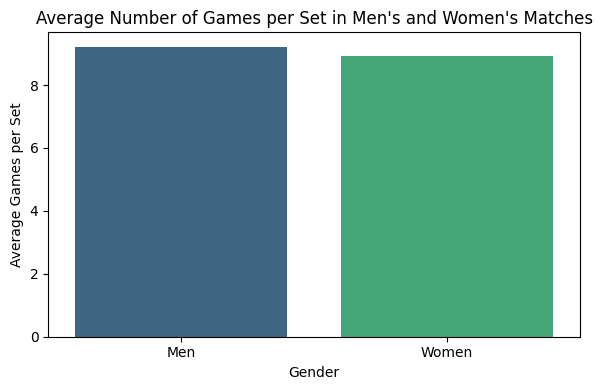

In [564]:
match_gender_info=pd.concat([home_team[['match_id','gender']],away_team[['match_id','gender']]]).drop_duplicates()

games_per_set = pbp.groupby(['match_id','set_id'])['game_id'].nunique().reset_index(name='game_count').drop_duplicates()
games_per_set_with_gender  = pd.merge(games_per_set, match_gender_info, on='match_id')

average_games_men = games_per_set_with_gender[games_per_set_with_gender['gender'] == 'M']['game_count'].mean()
average_games_women = games_per_set_with_gender[games_per_set_with_gender['gender'] == 'F']['game_count'].mean()

print(f"The average number of games per set in men's matches is {average_games_men:.2f}.")
print(f"The average number of games per set in women's matches is {average_games_women:.2f}.")

# Create a DataFrame for plotting
average_games_data = pd.DataFrame({
    'Gender': ['Men', 'Women'],
    'Average Games per Set': [average_games_men, average_games_women]
})

# Plot the data
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Average Games per Set', data=average_games_data, palette='viridis')

plt.xlabel('Gender')
plt.ylabel('Average Games per Set')
plt.title('Average Number of Games per Set in Men\'s and Women\'s Matches')
plt.tight_layout()

# Display the plot
plt.show()

13. What is the distribution of left-handed versus right-handed players?

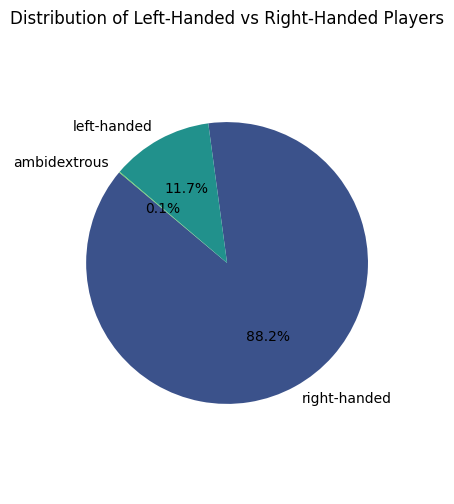

In [568]:
# Combine both home and away team data to analyze the distribution of left vs right-handed players
df_combined =pd.concat([home_team[['player_id','plays']],away_team[['player_id','plays']]]).drop_duplicates()

# Calculate the distribution
distribution = df_combined['plays'].value_counts().reset_index()
distribution.columns = ['handedness', 'count']

distribution

# Plotting the distribution using a pie chart
plt.figure(figsize=(4, 6))
plt.pie(distribution['count'], labels=distribution['handedness'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(distribution)))
plt.title('Distribution of Left-Handed vs Right-Handed Players')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

14. What is the most common type of surface used in tournaments?

The most common type of surface used in tournaments is: Red clay


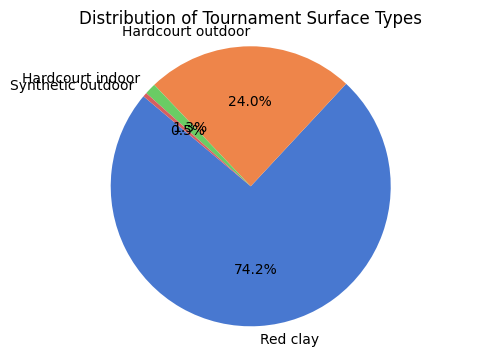

In [580]:
highest_ground_type=tournament['ground_type'].value_counts().idxmax()
print(f"The most common type of surface used in tournaments is: {highest_ground_type}")

surface_distribution = tournament['ground_type'].value_counts().reset_index()
surface_distribution.columns = ['surface_type', 'count']

# Plotting the distribution using a pie chart
plt.figure(figsize=(6, 4))
plt.pie(surface_distribution['count'], labels=surface_distribution['surface_type'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted', len(surface_distribution)))
plt.title('Distribution of Tournament Surface Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

15. How many distinct countries are represented in the dataset?

In [447]:
# Extract country columns
home_country = home_team['country']
away_country = away_team['country']

# Combine and count unique country
all_country = pd.concat([home_country, away_country])
unique_country = all_country.unique()

# Number of unique country
num_unique_country = len(unique_country)
print(f'The number of unique countries in the dataset is: {num_unique_country}')

The number of unique countries in the dataset is: 98


16. Which player has the highest winning percentage against top 10 ranked opponents?

The player with the highest winning percentage against top 10 ranked opponents is Dimitrov G. with 100.00% wins.


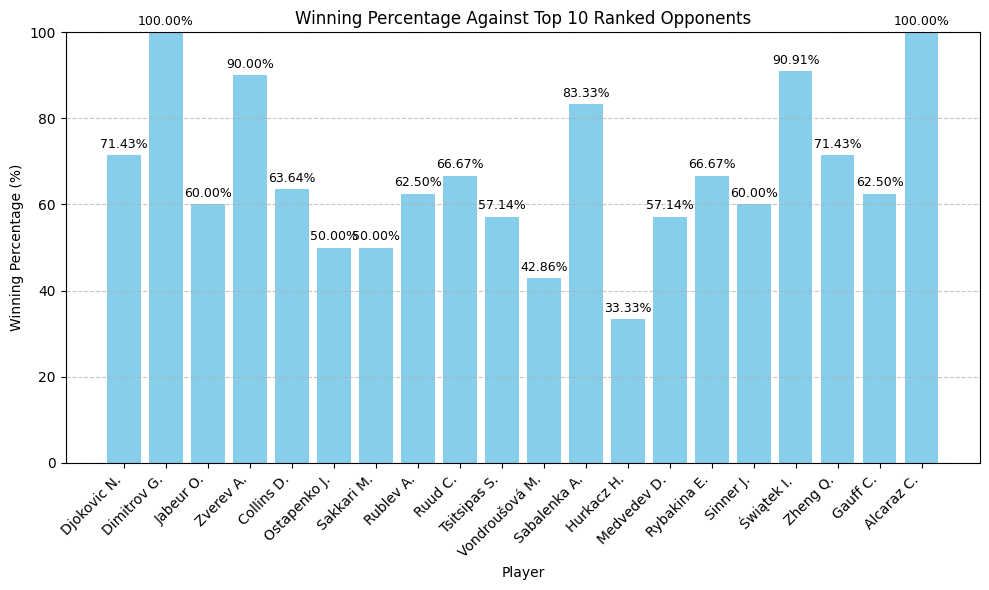

In [581]:
opponents = pd.concat([home_team[['player_id','current_rank']],away_team[['player_id','current_rank']]]).drop_duplicates()
top_10_opponents= opponents[(opponents['current_rank'] <= 10)]
# & (opponents['player_id']==64496)

match_player_ids=pd.concat([home_team[['match_id','player_id']],away_team[['match_id','player_id']]]).drop_duplicates()
# match_player_ids
# match_player_ids[match_player_ids['match_id']== 12346357]
top_10_matches=match_player_ids.merge(top_10_opponents,on='player_id', how='inner')
top_10_matches


# Merge to get winning matches
top_10_winning_matches = top_10_matches.merge(all_winners, on=['match_id', 'player_id'], how='left', indicator=True)
top_10_winning_matches

# Calculate wins and total matches
top_10_winning_matches['win'] = (top_10_winning_matches['_merge'] == 'both').astype(int)
top_10_winning_matches['total_matches'] = 1
top_10_winning_matches


# Step 3: Calculate Winning Percentage
winning_stats = top_10_winning_matches.groupby('player_id').agg({'win': 'sum', 'total_matches': 'sum'}).reset_index()
winning_stats['winning_percentage'] = winning_stats['win'] / winning_stats['total_matches'] * 100
winning_stats

# Get player names
player_names = pd.concat([home_team[['player_id', 'name']], away_team[['player_id', 'name']]]).drop_duplicates()
winning_stats = winning_stats.merge(player_names, on='player_id', how='inner')

# Find player with highest winning percentage
top_player = winning_stats.loc[winning_stats['winning_percentage'].idxmax()]

print(f'The player with the highest winning percentage against top 10 ranked opponents is {top_player["name"]} with {top_player["winning_percentage"]:.2f}% wins.')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(winning_stats['name'], winning_stats['winning_percentage'], color='skyblue')
plt.xlabel('Player')
plt.ylabel('Winning Percentage (%)')
plt.title('Winning Percentage Against Top 10 Ranked Opponents')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)  # Optional: Set appropriate y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate bars with percentages
for i, v in enumerate(winning_stats['winning_percentage']):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=9)

plt.show()

17. What is the average number of breaks of serve per match?

In [478]:
# Filter the statistics for break points converted
breaks_stats = statistics[(statistics['period'] == 'ALL') & (statistics['statistic_name'] == 'break_points_converted')]


# Ensure home_stat and away_stat are numeric
breaks_stats['home_stat'] = pd.to_numeric(breaks_stats['home_stat'], errors='coerce')
breaks_stats['away_stat'] = pd.to_numeric(breaks_stats['away_stat'], errors='coerce')

# Sum the breaks for both home and away teams for each match
breaks_stats['total_breaks'] = breaks_stats['home_stat'] + breaks_stats['away_stat']

# Group by match_id to sum the total breaks per match
# total_breaks_per_match = breaks_stats.groupby('match_id')['total_breaks'].sum()

# # Calculate the average number of breaks per match
average_breaks_per_match = breaks_stats['total_breaks'].mean()

print(f"The average number of breaks of serve per match is: {average_breaks_per_match:.2f}")

The average number of breaks of serve per match is: 7.22


/tmp/ipykernel_9761/917158654.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breaks_stats['home_stat'] = pd.to_numeric(breaks_stats['home_stat'], errors='coerce')
/tmp/ipykernel_9761/917158654.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breaks_stats['away_stat'] = pd.to_numeric(breaks_stats['away_stat'], errors='coerce')
/tmp/ipykernel_9761/917158654.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value